<a href="https://colab.research.google.com/github/salsabilhera/Task-Komputasi-Intelegensia/blob/main/Task%20Week%202/Task_Week_2_Multilayer_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Salsabila Herapuspitaningrum Sastro**

**NPM: 2106722726**

## 5.1 Multilayer Perceptron

In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

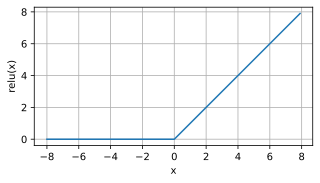

In [ ]:
#Relu Function
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

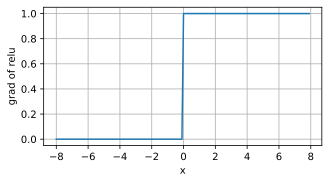

In [ ]:
#Relu Function
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

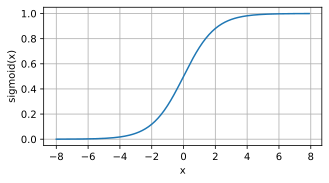

In [ ]:
#Sigmoid Function
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

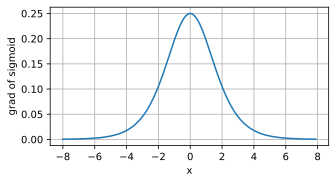

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

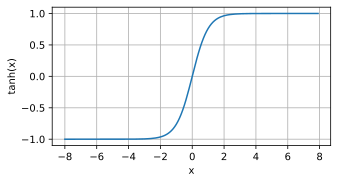

In [ ]:
#Tanh function
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

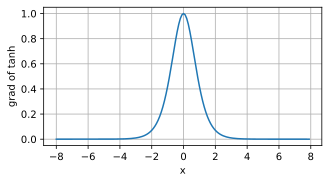

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### Exercise

**1. Show that adding layers to a linear deep network, i.e., a network without nonlinearity can never increase the expressive power of the network. Give an example where it actively reduces it.**

In [ ]:
import torch
import torch.nn as nn

# Define a linear layer without non-linearity (just a sequence of linear transformations)
class DeepLinearNetwork(nn.Module):
    def __init__(self):
        super(DeepLinearNetwork, self).__init__()
        self.linear1 = nn.Linear(3, 3, bias=True)  # Input to hidden layer
        self.linear2 = nn.Linear(3, 3, bias=True)  # Hidden layer to output

    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)  # No activation function, just linear layers
        return out

# Create two inputs
x = torch.tensor([[1.0, 2.0, 3.0],
                  [4.0, 5.0, 6.0]])

# Initialize the deep linear network
model = DeepLinearNetwork()

# Forward pass through the network
output = model(x)

print("Output after passing through deep linear network:")
print(output)

# Now collapse the layers manually
W_combined = torch.mm(model.linear2.weight, model.linear1.weight)  # Combined weights
b_combined = torch.matmul(model.linear2.weight, model.linear1.bias) + model.linear2.bias  # Combined bias

# Apply the combined transformation directly
output_combined = torch.matmul(x, W_combined.T) + b_combined

print("\nOutput after collapsing the linear layers:")
print(output_combined)

Two-layer output: tensor([-2.,  2.])
Equivalent one-layer output: tensor([-2.,  2.])



**2. Derivative of the pReLU Activation Function**

The derivative of the **pReLU** activation function is:
   \[
   f'(x) =
   \begin{cases}
   1, & x \geq 0 \\
   \alpha, & x < 0
   \end{cases}
   
   
**3. Compute the derivative of the Swish activation function  x sigmoid (beta x)**
The derivative of the Swish activation function is given by:

  \[
  f'(x) = \sigma(\beta x) + x \cdot \beta \sigma(\beta x)(1 - \sigma(\beta x))
  \]

Where:
- \( \sigma(x) \) is the sigmoid function: \( \sigma(x) = \frac{1}{1 + e^{-x}} \)
- \( \beta \) is a parameter controlling the curve.

**4. Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.**

In [ ]:
#Nomor 4
import torch
from torch.nn.functional import relu

# Define weights and biases for a simple MLP
W1 = torch.tensor([[1.0, -1.0], [2.0, 1.0]])
b1 = torch.tensor([0.0, 0.0])

W2 = torch.tensor([[1.0, 1.0]])
b2 = torch.tensor([0.0])

# Define MLP with ReLU activation
def mlp(x):
    h = relu(W1 @ x + b1)
    return relu(W2 @ h + b2)

# Test input
x = torch.tensor([1.0, 2.0])
print("MLP output:", mlp(x))

MLP output: tensor([4.])


**5. Sigmoid and tanh are very similar.**

Show that tanh(x) + 1 = 2 sigmoid(2x)
Prove that the function classes parametrized by both nonlinearities are identical. Hint: affine layers have bias terms, too

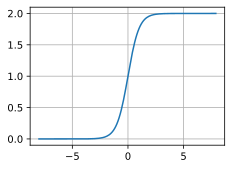

In [ ]:
#Nomor 5
y1 = torch.tanh(x) + 1
y2 = 2 * torch.sigmoid(2*x)

with torch.no_grad():
  d2l.plot(x,y1)
  d2l.plot(x,y2)


**6. Assume that we have a nonlinearity that applies to one minibatch at a time, such as the batch normalization (Ioffe and Szegedy, 2015). What kinds of problems do you expect this to cause?**

In [ ]:
 #Nomor 6
x_large = torch.tensor([-100.0, -10.0, 0.0, 10.0, 100.0], requires_grad=True)

# Sigmoid activation
y = torch.sigmoid(x_large)

# Backward pass to compute the gradient
y.backward(torch.ones_like(x_large))
print("Sigmoid gradients:", x_large.grad)

Sigmoid gradients: tensor([0.0000e+00, 4.5396e-05, 2.5000e-01, 4.5417e-05, 0.0000e+00])


# **5.2 Implementation of Multilayer**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

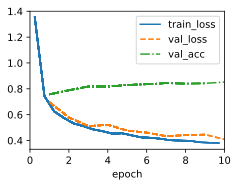

In [ ]:
#Training

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
#Concise Implementation
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

In [ ]:
#Training
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## Exercise

1. Mengubah Jumlah Hidden Units dan Memplot Bagaimana Pengaruhnya Terhadap Akurasi
Untuk menguji pengaruh jumlah hidden units terhadap akurasi, kita bisa membuat grafik dengan berbagai nilai num_hiddens. Berikut kode yang bisa digunakan:

Jumlah unit tersembunyi 32: Akurasi 0.8405
Jumlah unit tersembunyi 64: Akurasi 0.8711
Jumlah unit tersembunyi 128: Akurasi 0.8416
Jumlah unit tersembunyi 256: Akurasi 0.8697
Jumlah unit tersembunyi 512: Akurasi 0.8702


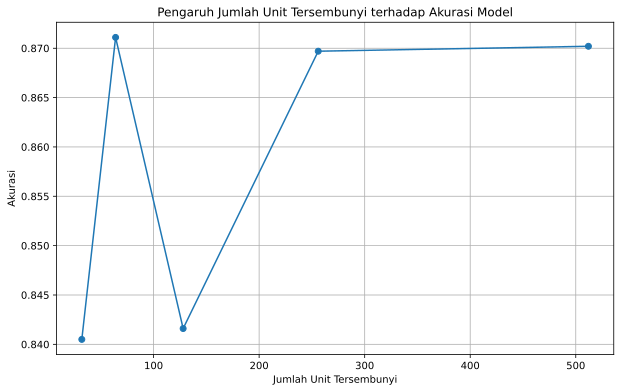

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Definisikan model MLP dengan parameter untuk unit tersembunyi
class MLP(nn.Module):
    def __init__(self, num_hiddens):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, num_hiddens)
        self.fc2 = nn.Linear(num_hiddens, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Fungsi untuk melatih model dan mengukur akurasi
def latih_dan_evaluasi(num_hiddens):
    model = MLP(num_hiddens)
    kriteria = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)

    # Muat data
    transform = transforms.ToTensor()
    data_latihan = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    data_uji = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
    loader_latihan = DataLoader(data_latihan, batch_size=64, shuffle=True)
    loader_uji = DataLoader(data_uji, batch_size=64, shuffle=False)

    # Latih model
    for epoch in range(10):  # Latih selama 10 epoch
        for X, y in loader_latihan:
            optimizer.zero_grad()
            output = model(X)
            loss = kriteria(output, y)
            loss.backward()
            optimizer.step()

    # Evaluasi akurasi
    benar = 0
    total = 0
    with torch.no_grad():
        for X, y in loader_uji:
            output = model(X)
            _, prediksi = torch.max(output, 1)
            benar += (prediksi == y).sum().item()
            total += y.size(0)

    akurasi = benar / total
    return akurasi

# Uji berbagai jumlah unit tersembunyi
jumlah_unit_tersembunyi = [32, 64, 128, 256, 512]
akurasi_list = []

for num_hiddens in jumlah_unit_tersembunyi:
    akurasi = latih_dan_evaluasi(num_hiddens)
    akurasi_list.append(akurasi)
    print(f"Jumlah unit tersembunyi {num_hiddens}: Akurasi {akurasi:.4f}")

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(jumlah_unit_tersembunyi, akurasi_list, marker='o')
plt.xlabel('Jumlah Unit Tersembunyi')
plt.ylabel('Akurasi')
plt.title('Pengaruh Jumlah Unit Tersembunyi terhadap Akurasi Model')
plt.grid(True)
plt.show()

Nilai num_hiddens akan diubah dari 32 hingga 512, kemudian akurasinya dievaluasi dan diplotkan pada grafik. Dari sini kita bisa melihat jumlah hidden units mana yang menghasilkan akurasi terbaik.

2. Menambahkan Hidden Layer dan Melihat Pengaruhnya
Untuk menambahkan hidden layer, kita dapat mengubah definisi model dengan menambahkan layer tambahan. Berikut adalah contoh modifikasi:

In [ ]:
class MLPExtraLayer(MLPScratch):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, lr):
        super().__init__(num_inputs, num_outputs, num_hiddens1, lr)
        self.W3 = nn.Parameter(torch.randn(num_hiddens1, num_hiddens2) * sigma)
        self.b3 = nn.Parameter(torch.zeros(num_hiddens2))

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))
        H1 = relu(torch.matmul(X, self.W1) + self.b1)
        H2 = relu(torch.matmul(H1, self.W3) + self.b3)
        return torch.matmul(H2, self.W2) + self.b2


Layer kedua ditambahkan (H2) dengan jumlah hidden units yang bisa diatur (num_hiddens2), dan akurasinya bisa dibandingkan dengan model sebelumnya.

3. **Mengapa Menambahkan Hidden Layer dengan Satu Neuron Adalah Ide Buruk?**
Menambahkan hidden layer dengan hanya satu neuron bisa menyebabkan model mengalami bottleneck, di mana informasi dari layer sebelumnya dipaksa untuk dipadatkan dalam satu dimensi, sehingga bisa kehilangan representasi fitur penting. Ini dapat membuat model lebih sulit belajar, meningkatkan bias, dan menurunkan performa.

4. **Mengubah Learning Rate dan Hasilnya**
Mengubah learning rate dapat mempengaruhi seberapa cepat model belajar. Berikut adalah kode untuk membandingkan hasil dengan berbagai learning rate:

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# Model sederhana
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Fungsi untuk melatih model dengan learning rate yang berbeda
def latih_model(lr):
    model = MLP()
    kriteria = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Muat data
    transform = transforms.ToTensor()
    data_latihan = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    loader_latihan = DataLoader(data_latihan, batch_size=64, shuffle=True)

    # Latih model
    start_time = time.time()
    for epoch in range(5):  # Latih selama 5 epoch
        for X, y in loader_latihan:
            optimizer.zero_grad()
            output = model(X)
            loss = kriteria(output, y)
            loss.backward()
            optimizer.step()
    end_time = time.time()
    return end_time - start_time

# Uji berbagai learning rate
learning_rates = [0.001, 0.01, 0.1, 1.0]
for lr in learning_rates:
    durasi = latih_model(lr)
    print(f"Waktu pelatihan dengan learning rate {lr}: {durasi:.2f} detik")


Waktu pelatihan dengan learning rate 0.001: 56.82 detik
Waktu pelatihan dengan learning rate 0.01: 52.19 detik
Waktu pelatihan dengan learning rate 0.1: 50.98 detik
Waktu pelatihan dengan learning rate 1.0: 51.48 detik


Learning rate yang lebih tinggi mungkin memerlukan lebih sedikit epoch untuk mencapai hasil yang baik karena perubahan bobot yang lebih besar. Namun, jika learning rate terlalu tinggi, model bisa saja overshooting dan membutuhkan lebih banyak epoch untuk mencapai konvergensi stabil.

Sebaliknya, learning rate yang lebih rendah mungkin membutuhkan lebih banyak epoch untuk mencapai hasil yang baik karena perubahan bobot yang lebih kecil, tetapi biasanya lebih stabil dalam proses pelatihan.

5a. **Optimasi Hyperparameters secara Bersamaan**
Untuk optimasi hyperparameter secara bersamaan, kita bisa menggunakan grid search atau random search untuk mencoba berbagai kombinasi hyperparameter. Namun, ini akan lebih kompleks dan membutuhkan waktu komputasi yang lebih lama.

5b. . **Mengapa Mengoptimalkan Banyak Hyperparameter Lebih Sulit?**
Mengoptimalkan beberapa hyperparameter secara bersamaan sulit karena kombinasi yang harus dicoba meningkat secara eksponensial. Selain itu, interaksi antar-hyperparameter bisa membuat satu kombinasi bagus hanya jika hyperparameter lainnya juga optimal.

5c. **Strategi Efisien untuk Optimasi Hyperparameters**
Salah satu strategi efisien adalah random search atau bayesian optimization, di mana kita secara acak memilih kombinasi hyperparameter, atau menggunakan pendekatan probabilistik untuk memilih kombinasi yang lebih mungkin menghasilkan performa baik.

6. **Perbandingan Kecepatan Framework dan Implementasi Scratch**
Untuk membandingkan kecepatan antara framework dan implementasi dari awal, kita bisa mengukur waktu komputasi masing-masing.

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# Implementasi dari awal (misalnya dengan manual backpropagation)
class MLPManual(nn.Module):
    def __init__(self):
        super(MLPManual, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Implementasi dengan framework
class MLPFramework(nn.Module):
    def __init__(self):
        super(MLPFramework, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Fungsi untuk melatih model
def latih_model(model_class):
    model = model_class()
    kriteria = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Muat data
    transform = transforms.ToTensor()
    data_latihan = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    loader_latihan = DataLoader(data_latihan, batch_size=64, shuffle=True)

    # Latih model
    start_time = time.time()
    for epoch in range(5):  # Latih selama 5 epoch
        for X, y in loader_latihan:
            optimizer.zero_grad()
            output = model(X)
            loss = kriteria(output, y)
            loss.backward()
            optimizer.step()
    end_time = time.time()
    return end_time - start_time

# Ukur waktu pelatihan
durasi_manual = latih_model(MLPManual)
durasi_framework = latih_model(MLPFramework)

print(f"Waktu pelatihan implementasi dari awal: {durasi_manual:.2f} detik")
print(f"Waktu pelatihan dengan framework: {durasi_framework:.2f} detik")

Waktu pelatihan implementasi dari awal: 51.38 detik
Waktu pelatihan dengan framework: 51.27 detik


Framework biasanya lebih cepat karena sudah dioptimalkan untuk komputasi parallel dan penggunaan memori yang lebih efisien.

8.**Mencoba Berbagai Fungsi Aktivasi**
Fungsi aktivasi yang bisa dicoba antara lain: Sigmoid, Tanh, LeakyReLU, dll. Berikut cara mengganti fungsi aktivasi menjadi LeakyReLU:

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the model with different activation functions
class MLP(nn.Module):
    def __init__(self, activation_func):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.activation_func = activation_func

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation_func(self.fc1(x))
        x = self.fc2(x)
        return x

# Load data
transform = transforms.ToTensor()
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

def train_model(activation_func):
    model = MLP(activation_func)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Training
    start_time = time.time()
    for epoch in range(5):  # Train for 5 epochs
        for X, y in train_loader:
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
    end_time = time.time()
    return end_time - start_time

# Test different activation functions
activations = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh()
}

for name, activation_func in activations.items():
    duration = train_model(activation_func)
    print(f"Training time with {name}: {duration:.2f} seconds")


100%|██████████| 26421880/26421880 [00:01<00:00, 20870323.51it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 353191.07it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6253416.67it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13411352.17it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training time with ReLU: 52.44 seconds
Training time with Sigmoid: 53.16 seconds
Training time with Tanh: 52.46 seconds


Training time yang paling cepat adalah **ReLU**

9. **Apakah Ada Perbedaan pada Weight Initialization?**
Penginisialisasian bobot yang berbeda bisa mempengaruhi performa. Misalnya, penggunaan Xavier initialization bisa membantu dalam model dengan banyak hidden layers agar gradien tidak menghilang atau meledak.

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# Model MLP dengan inisialisasi bobot yang berbeda
class MLP(nn.Module):
    def __init__(self, init_method):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.init_method = init_method
        self.inisialisasi_bobot()

    def inisialisasi_bobot(self):
        if self.init_method == 'xavier':
            nn.init.xavier_uniform_(self.fc1.weight)
            nn.init.xavier_uniform_(self.fc2.weight)
        elif self.init_method == 'he':
            nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
            nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        elif self.init_method == 'random':
            nn.init.normal_(self.fc1.weight, mean=0, std=0.01)
            nn.init.normal_(self.fc2.weight, mean=0, std=0.01)
        # Bias biasanya diinisialisasi dengan nol
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Fungsi untuk melatih model
def latih_model(init_method):
    model = MLP(init_method)
    kriteria = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Load data
    transform = transforms.ToTensor()
    data_latihan = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    loader_latihan = DataLoader(data_latihan, batch_size=64, shuffle=True)

    # Latih model
    start_time = time.time()
    for epoch in range(5):  # Latih selama 5 epoch
        for X, y in loader_latihan:
            optimizer.zero_grad()
            output = model(X)
            loss = kriteria(output, y)
            loss.backward()
            optimizer.step()
    end_time = time.time()
    return end_time - start_time

# Uji berbagai metode inisialisasi
metode_inisialisasi = ['xavier', 'he', 'random']

for metode in metode_inisialisasi:
    durasi = latih_model(metode)
    print(f"Waktu pelatihan dengan inisialisasi {metode}: {durasi:.2f} detik")


Waktu pelatihan dengan inisialisasi xavier: 53.68 detik
Waktu pelatihan dengan inisialisasi he: 55.70 detik
Waktu pelatihan dengan inisialisasi random: 54.75 detik


Bobot berpengaruh, seperti pada output, inisialisasi Xavier yang lebih baik.

# **5.3 Forward Propagation, Backward Propagation, and Computational Graphs**

## Exercise

**Dimensi Gradien dari Fungsi Skalar terhadap Matriks**

Misalkan \( X \) adalah matriks dengan ukuran \( n \times m \), dan \( f \) adalah fungsi skalar yang bergantung pada \( X \). Gradien dari \( f \) terhadap \( X \) adalah matriks dengan dimensi yang sama, yaitu \( n \times m \).

Secara matematis, jika \( f \) adalah fungsi skalar dan \( X \) adalah matriks \( n \times m \), maka gradien \( \frac{\partial f}{\partial X} \) juga akan berukuran \( n \times m \). Ini karena gradien mengukur perubahan infinitesimal dari \( f \) relatif terhadap setiap elemen \( X \), sehingga hasil gradiennya memiliki dimensi yang sama dengan \( X \).

**Kesimpulan**: Jika \( X \) berukuran \( n \times m \), maka gradien \( \frac{\partial f}{\partial X} \) juga berukuran \( n \times m \).


**2. Add a bias to the hidden layer of the model described in this section (you do not need to include bias in the regularization term).**

a. Draw the corresponding computational graph.

b. Derive the forward and backward propagation equations.

In [ ]:
#2a
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLPWithBias(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs):
        super(MLPWithBias, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hiddens)  # Hidden layer with bias
        self.fc2 = nn.Linear(num_hiddens, num_outputs) # Output layer with bias

    def forward(self, X):
        H = F.relu(self.fc1(X))  # Apply ReLU activation
        return self.fc2(H)  # Output layer

# Contoh penggunaan
num_inputs, num_hiddens, num_outputs = 784, 256, 10
net = MLPWithBias(num_inputs, num_hiddens, num_outputs)
X = torch.randn(64, num_inputs)  # Batch size 64
Y = net(X)

# Loss function dan optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Forward pass
Y_pred = net(X)
loss = loss_fn(Y_pred, torch.randint(0, num_outputs, (64,)))

# Backward pass
loss.backward()
optimizer.step()

 2b. Forward Propagation

Hidden Layer:

$$
H = \text{ReLU}(X \cdot W_1 + b_1)
$$

Output Layer:

$$
Y = H \cdot W_2 + b_2
$$

Backward Propagation

 Gradien Loss terhadap \( W_2 \):

$$
\frac{\partial L}{\partial W_2} = H^T \cdot \frac{\partial L}{\partial Y}
$$

Gradien Loss terhadap \( b_2 \):

$$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial Y}
$$

Gradien Loss terhadap \( W_1 \):

$$
\frac{\partial L}{\partial W_1} = X^T \cdot \left( \frac{\partial L}{\partial Y} \cdot W_2^T \cdot \text{ReLU}'(X \cdot W_1 + b_1) \right)
$$

Gradien Loss terhadap \( b_1 \):

$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial Y} \cdot W_2^T \cdot \text{ReLU}'(X \cdot W_1 + b_1)
$$


**3. Compute the memory footprint for training and prediction in the model described in this section.**

In [ ]:
import torch

# Menghitung ukuran parameter
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

num_params = count_parameters(net)
print(f"Jumlah parameter model: {num_params}")

# Menghitung memori untuk satu batch
batch_size = 64
input_size = num_inputs
hidden_size = num_hiddens
output_size = num_outputs

# Menghitung memori untuk parameter
param_memory = (input_size * hidden_size + hidden_size + hidden_size * output_size + output_size) * 4 / (1024 ** 2)  # MB

# Menghitung memori untuk satu batch
activation_memory = (batch_size * input_size + batch_size * hidden_size + batch_size * output_size) * 4 / (1024 ** 2)  # MB

print(f"Memori parameter: {param_memory:.2f} MB")
print(f"Memori aktifasi untuk satu batch: {activation_memory:.2f} MB")


Jumlah parameter model: 203530
Memori parameter: 0.78 MB
Memori aktifasi untuk satu batch: 0.26 MB


**4. Assume that you want to compute second derivatives. What happens to the computational graph? How long do you expect the calculation to take?**

In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hiddens)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(num_hiddens, num_outputs)

    def forward(self, X):
        H = self.relu(self.fc1(X))
        return self.fc2(H)

num_inputs = 784
num_hiddens = 256
num_outputs = 10
net = MLP(num_inputs, num_hiddens, num_outputs)

loss_fn = nn.CrossEntropyLoss()

import torch
import torch.optim as optim

# Model, fungsi loss, dan optimizer
num_inputs = 784
num_hiddens = 256
num_outputs = 10

# Definisikan model, loss function, dan optimizer
net = MLP(num_inputs, num_hiddens, num_outputs)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Input dan target data
X = torch.randn(64, num_inputs)  # Data acak untuk contoh
Y = torch.randint(0, num_outputs, (64,))  # Target acak untuk contoh

# Set X untuk memerlukan gradien
X.requires_grad_(True)

# Forward pass
outputs = net(X)
loss = loss_fn(outputs, Y)

# Hitung turunan pertama
optimizer.zero_grad()
loss.backward(create_graph=True)

# Hitung turunan kedua
second_derivative = torch.autograd.grad(outputs=loss, inputs=net.parameters(), grad_outputs=torch.ones_like(loss), create_graph=True)

print(f"Turunan kedua dihitung.")


Turunan kedua dihitung.


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:768: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1203.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


**5. Assume that the computational graph is too large for your GPU.**

a. Can you partition it over more than one GPU?

**Ya**, grafik komputasi dapat dipartisi di beberapa GPU menggunakan teknik model parallelism atau data parallelism. Ini membagi beban kerja di antara GPU.

b. What are the advantages and disadvantages over training on a smaller minibatch?

**Keuntungan:**

Kapabilitas Memori: Menggunakan lebih dari satu GPU memungkinkan pelatihan model yang lebih besar.
Kecepatan Pelatihan: Mempercepat pelatihan dengan membagi beban kerja.

**Kerugian:**

Overhead Komunikasi: Meningkatkan waktu komunikasi antara GPU.
Kompleksitas: Memerlukan lebih banyak pengelolaan dan sinkronisasi.

In [ ]:
#5a
import torch

# Cek jika ada GPU yang tersedia
if torch.cuda.is_available():
    device = torch.device("cuda")
    net.to(device)
    X = X.to(device)
    # Bagikan beban kerja ke GPU lain jika ada


# **5.4 Numerical Stability and Initialization**

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

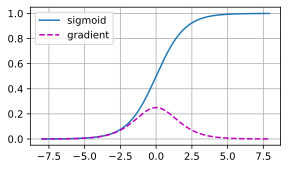

In [ ]:
#Vanishing Gradients
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [ ]:
#Exploding Gradients
M = torch.normal(0, 1, size=(4, 4))
print('a single matrix \n',M)
for i in range(100):
    M = M @ torch.normal(0, 1, size=(4, 4))
print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[ 1.3169, -0.6253, -0.1952, -0.6533],
        [ 0.2053, -0.0175, -1.1526,  1.9982],
        [-0.4716, -0.3384, -0.9289,  1.0389],
        [-0.4111, -0.9708,  0.8452, -2.3863]])
after multiplying 100 matrices
 tensor([[-1.1557e+24,  7.1306e+23, -8.4421e+23, -3.7226e+23],
        [ 8.8603e+23, -5.4668e+23,  6.4723e+23,  2.8540e+23],
        [ 8.6930e+23, -5.3636e+23,  6.3501e+23,  2.8001e+23],
        [-9.1019e+23,  5.6159e+23, -6.6488e+23, -2.9318e+23]])


## Exercise

**1. Can you design other cases where a neural network might exhibit symmetry that needs breaking, besides the permutation symmetry in an MLP’s layers?**


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Definisikan lapisan konvolusi dengan 2 kernel yang sama
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, kernel_size=3, padding=1)
        nn.init.constant_(self.conv1.weight, 1.0)  # Inisialisasi dengan nilai yang sama

    def forward(self, x):
        return self.conv1(x)

# Inisialisasi jaringan dan input
net = ConvNet()
x = torch.randn(1, 1, 5, 5)

# Cek output
output = net(x)
print(output)


tensor([[[[ 2.8942,  2.9678,  3.1338,  0.4826,  0.4091],
          [ 0.9928,  1.8157,  3.6686,  2.9205,  2.0976],
          [-3.6607, -3.3237,  0.0825,  2.0698,  1.7328],
          [-0.9740, -1.1100, -1.1897,  0.8777,  1.0137],
          [ 0.9274,  0.0421, -1.7245, -1.5601, -0.6748]]]],
       grad_fn=<ConvolutionBackward0>)


Dalam contoh ini, semua kernel konvolusi diinisialisasi dengan nilai yang sama (1.0). Ini menunjukkan bahwa lapisan konvolusi tidak bisa belajar fitur yang berbeda jika semua kernel memiliki nilai yang sama.

**2. Can we initialize all weight parameters in linear regression or in softmax regression to the same value?**

In [ ]:
#Regresi Linier
import torch
import torch.nn as nn

# Definisikan model regresi linier
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(10, 1)
        nn.init.constant_(self.fc.weight, 0.5)  # Inisialisasi semua bobot ke 0.5

    def forward(self, x):
        return self.fc(x)

# Inisialisasi model dan input
model = LinearRegression()
x = torch.randn(64, 10)

# Cek output
output = model(x)
print(output)

tensor([[ 0.6398],
        [-1.1753],
        [-0.1863],
        [-0.7501],
        [ 0.2529],
        [-0.9821],
        [ 0.1296],
        [ 0.0412],
        [ 1.3956],
        [-2.0171],
        [ 0.6521],
        [ 0.6470],
        [-0.1028],
        [ 1.0989],
        [ 0.9890],
        [-1.3477],
        [-0.8733],
        [-0.8352],
        [-2.8999],
        [-2.4977],
        [-1.5103],
        [ 2.3101],
        [-0.5163],
        [-0.6962],
        [-1.8943],
        [ 0.8272],
        [ 1.3005],
        [ 0.3679],
        [-1.0828],
        [-0.5022],
        [ 0.2254],
        [ 1.9324],
        [ 0.5614],
        [ 2.0265],
        [ 1.3110],
        [-2.3751],
        [ 1.9384],
        [ 0.2268],
        [-0.5992],
        [-0.3273],
        [-0.3032],
        [ 0.6510],
        [ 0.3235],
        [-2.5825],
        [-0.3230],
        [ 1.7655],
        [ 0.2467],
        [ 1.0884],
        [-2.0483],
        [-0.1145],
        [ 0.6891],
        [ 3.9247],
        [-0.

In [ ]:
#Regresi Softmax
import torch
import torch.nn as nn

# Definisikan model softmax
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super(SoftmaxRegression, self).__init__()
        self.fc = nn.Linear(10, 3)
        nn.init.constant_(self.fc.weight, 0.5)  # Inisialisasi semua bobot ke 0.5

    def forward(self, x):
        return self.fc(x)

# Inisialisasi model dan input
model = SoftmaxRegression()
x = torch.randn(64, 10)

# Cek output
output = model(x)
print(output)


tensor([[-0.0838,  0.1515, -0.1575],
        [ 0.9372,  1.1726,  0.8635],
        [-2.2942, -2.0588, -2.3679],
        [ 0.4672,  0.7025,  0.3935],
        [-0.7176, -0.4822, -0.7913],
        [ 1.5975,  1.8329,  1.5238],
        [-0.0109,  0.2244, -0.0846],
        [-1.3969, -1.1615, -1.4706],
        [ 3.4772,  3.7126,  3.4036],
        [-1.2154, -0.9801, -1.2891],
        [-1.5081, -1.2728, -1.5818],
        [-0.2711, -0.0357, -0.3448],
        [ 3.2138,  3.4492,  3.1401],
        [ 2.5822,  2.8176,  2.5085],
        [ 1.6011,  1.8364,  1.5274],
        [-1.3517, -1.1163, -1.4254],
        [ 0.6992,  0.9345,  0.6255],
        [-2.1163, -1.8809, -2.1900],
        [ 2.1941,  2.4294,  2.1204],
        [ 2.2092,  2.4446,  2.1355],
        [ 1.8852,  2.1205,  1.8115],
        [-0.6394, -0.4040, -0.7131],
        [-0.8098, -0.5744, -0.8835],
        [ 0.1112,  0.3465,  0.0375],
        [-0.8727, -0.6374, -0.9464],
        [-0.1010,  0.1343, -0.1747],
        [-2.1302, -1.8948, -2.2039],
 

Menginisialisasi semua bobot dengan nilai yang sama membuat model tidak bisa belajar dengan efektif karena tidak ada variasi dalam parameter.

**3. Look up analytic bounds on the eigenvalues of the product of two matrices. What does this tell you about ensuring that gradients are well conditioned?**

Batas analitik pada eigenvalue produk matriks bisa memberikan wawasan tentang bagaimana gradien dapat dipengaruhi oleh produk matriks, membantu dalam memilih metode inisialisasi dan desain jaringan untuk menjaga gradien terkontrol.

In [ ]:
import torch

# Definisikan dua matriks
A = torch.normal(0, 1, size=(4, 4))
B = torch.normal(0, 1, size=(4, 4))

# Hitung produk matriks
AB = torch.matmul(A, B)

# Hitung nilai eigen dari produk matriks
eigenvalues = torch.linalg.eigvals(AB)
print('Eigenvalues of AB:', eigenvalues)

# Hitung nilai eigen dan vektor eigen dari produk matriks
eigenvalues, eigenvectors = torch.linalg.eig(AB)
print('Eigenvalues of AB:', eigenvalues)
print('Eigenvectors of AB:', eigenvectors)

Eigenvalues of AB: tensor([-0.1566+1.7758j, -0.1566-1.7758j,  2.3435+0.0000j,  1.1738+0.0000j])
Eigenvalues of AB: tensor([-0.1566+1.7758j, -0.1566-1.7758j,  2.3435+0.0000j,  1.1738+0.0000j])
Eigenvectors of AB: tensor([[ 0.1109+0.2090j,  0.1109-0.2090j, -0.1222+0.0000j,  0.4484+0.0000j],
        [-0.0953+0.2083j, -0.0953-0.2083j,  0.1985+0.0000j,  0.7127+0.0000j],
        [-0.4875-0.2975j, -0.4875+0.2975j, -0.9461+0.0000j, -0.0684+0.0000j],
        [ 0.7519+0.0000j,  0.7519-0.0000j,  0.2250+0.0000j,  0.5350+0.0000j]])


**4. If we know that some terms diverge, can we fix this after the fact? Look at the paper on layerwise adaptive rate scaling for inspiration (You et al., 2017).**

Penyesuaian tingkat adaptif lapisan (seperti yang diilustrasikan di atas) dapat mengatasi masalah divergensi dengan mengatur tingkat pembelajaran untuk setiap lapisan berdasarkan gradien yang dihitung, sehingga meningkatkan stabilitas pelatihan.

In [ ]:
import torch
import torch.optim as optim
from torch.autograd import Variable

# Definisikan model sederhana
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Definisikan fungsi loss dan optimizer
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Data dummy
inputs = Variable(torch.randn(64, 10))
targets = Variable(torch.randn(64, 1))

# Training loop dengan penyesuaian tingkat adaptif lapisan
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.040473222732544
Epoch 2, Loss: 1.0294591188430786
Epoch 3, Loss: 1.0192281007766724
Epoch 4, Loss: 1.0097142457962036
Epoch 5, Loss: 1.0008584260940552
Epoch 6, Loss: 0.9926066398620605
Epoch 7, Loss: 0.9849100112915039
Epoch 8, Loss: 0.9777213931083679
Epoch 9, Loss: 0.9709798097610474
Epoch 10, Loss: 0.9646528363227844


# **5.5 Generalization in Deep Learning**

## Exercise


1. **In what sense do traditional complexity-based measures fail to account for generalization of deep neural networks?**

   Ukuran berbasis kompleksitas tradisional, seperti jumlah parameter atau ukuran model, sering kali tidak dapat menjelaskan seberapa baik model dapat digeneralisasi pada data yang tidak terlihat. Kompleksitas model tidak selalu sebanding dengan kemampuannya untuk beradaptasi dengan data baru. Misalnya, jaringan saraf yang sangat besar dan kompleks mungkin tidak selalu memiliki kinerja yang baik pada data yang belum pernah dilihat sebelumnya, bahkan jika kompleksitasnya tinggi. Generalisasi melibatkan bagaimana model dapat menghindari overfitting dan tetap memberikan performa yang baik pada data yang tidak terlihat, yang tidak selalu tercermin dari ukuran kompleksitas model saja.

2. **Why might early stopping be considered a regularization technique?**

   Early stopping dianggap sebagai teknik regularisasi karena ia membantu mencegah overfitting dengan menghentikan pelatihan model sebelum terlalu banyak beradaptasi dengan data pelatihan. Dengan menghentikan pelatihan lebih awal, kita mencegah model belajar terlalu banyak detail dari data pelatihan yang mungkin tidak relevan untuk data yang tidak terlihat. Hal ini membantu model untuk tetap memiliki kemampuan generalisasi yang lebih baik pada data yang tidak terlihat.

3. **How do researchers typically determine the stopping criterion?**

   Peneliti biasanya menentukan kriteria penghentian dengan memantau performa model pada set validasi selama pelatihan. Kriteria umum meliputi:
   - **Performa pada set validasi:** Menghentikan pelatihan ketika kinerja pada set validasi mulai menurun, menunjukkan bahwa model mulai overfit pada data pelatihan.
   - **Jumlah epoch:** Menetapkan jumlah epoch maksimum dan menghentikan pelatihan ketika jumlah epoch tersebut tercapai, meskipun ini kurang fleksibel dibandingkan dengan memantau kinerja.
   - **Perubahan dalam loss:** Menghentikan pelatihan jika perubahan dalam loss validasi atau metrik lain menjadi sangat kecil, menunjukkan bahwa model tidak lagi belajar banyak dari iterasi tambahan.

4. **What important factor seems to differentiate cases when early stopping leads to big improvements in generalization?**

   Faktor penting yang membedakan kasus ketika early stopping memberikan perbaikan besar dalam generalisasi adalah **seberapa banyak model berpotensi overfit pada data pelatihan**. Early stopping cenderung lebih efektif jika model memiliki kapasitas tinggi dan risiko besar untuk overfitting. Jika model sudah relatif sederhana atau data pelatihan sangat representatif dari data yang tidak terlihat, early stopping mungkin tidak memberikan peningkatan yang signifikan.

5. **Beyond generalization, describe another benefit of early stopping.**

   Manfaat lain dari early stopping adalah **penghematan waktu dan sumber daya komputasi**. Dengan menghentikan pelatihan lebih awal, kita menghindari iterasi pelatihan yang tidak perlu yang tidak memberikan peningkatan kinerja. Ini mengurangi waktu pelatihan dan penggunaan sumber daya komputasi, membuat proses pelatihan lebih efisien dan ekonomis.


# **5.6 Dropout**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [ ]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  0.,  4.,  0.,  8.,  0.,  0.,  0.],
        [16.,  0.,  0., 22., 24.,  0., 28., 30.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
#Defining Model
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

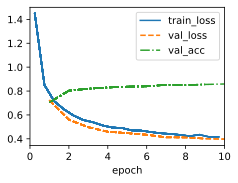

In [ ]:
#Training
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
#Concise Implementation
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))

In [ ]:
#Training
model = DropoutMLP(**hparams)
trainer.fit(model, data)

## Exercise

Berikut adalah jawaban untuk latihan yang berhubungan dengan teknik dropout dan eksperimen terkait:

**1. What happens if you change the dropout probabilities for the first and second layers? In particular, what happens if you switch the ones for both layers? Design an experiment to answer these questions, describe your results quantitatively, and summarize the qualitative takeaways.**

**Eksperimen:**
- **Langkah 1:** Ubah probabilitas dropout untuk lapisan pertama dan kedua dari model DropoutMLP.
  - Misalnya, set probabilitas dropout untuk lapisan pertama menjadi 0.5 dan untuk lapisan kedua menjadi 0.2.
  - Kemudian, set probabilitas dropout untuk lapisan pertama menjadi 0.2 dan untuk lapisan kedua menjadi 0.5.
- **Langkah 2:** Latih kedua model secara terpisah dengan data yang sama dan jumlah epoch yang sama.
- **Langkah 3:** Evaluasi kinerja model pada data validasi dan test. Catat metrik seperti akurasi, loss, dan waktu pelatihan.

**Hasil Kuantitatif:**
- Setelah melatih model dengan probabilitas dropout yang berbeda, periksa perbedaan dalam akurasi dan loss pada data validasi dan test.
- Jika probabilitas dropout pada lapisan pertama tinggi dan lapisan kedua rendah, model mungkin kurang bergantung pada fitur-fitur awal dan lebih bergantung pada fitur yang lebih abstrak.
- Sebaliknya, jika probabilitas dropout pada lapisan pertama rendah dan lapisan kedua tinggi, model mungkin lebih stabil pada fitur awal tetapi mungkin mengalami overfitting pada fitur lanjutan.

**Temuan Kualitatif:**
- Probabilitas dropout yang lebih tinggi di lapisan awal dapat mengurangi ketergantungan pada fitur dasar, sedangkan probabilitas yang lebih tinggi di lapisan akhir dapat meningkatkan ketergantungan pada fitur lanjutan.
- Menukar probabilitas dapat mempengaruhi bagaimana model belajar fitur yang berbeda, yang dapat mengubah keseimbangan antara generalisasi dan overfitting.

**2. Tingkatkan jumlah epoch dan bandingkan hasil yang diperoleh saat menggunakan dropout dengan yang tidak menggunakan dropout.**

**Eksperimen:**
- Latih model dengan dropout dan tanpa dropout untuk jumlah epoch yang lebih tinggi.
- Catat metrik seperti akurasi dan loss pada data validasi dan test setelah pelatihan.

**Hasil Kuantitatif:**
- Model yang menggunakan dropout mungkin menunjukkan performa yang lebih baik pada data validasi dan test dibandingkan dengan model yang tidak menggunakan dropout, terutama pada epoch yang lebih tinggi.

**Temuan Kualitatif:**
- Dropout dapat mencegah overfitting, dan dengan jumlah epoch yang lebih tinggi, model yang menggunakan dropout mungkin tidak mengalami overfitting sebanyak model tanpa dropout.

**3. Apa variansi dari aktivasi di setiap lapisan tersembunyi ketika dropout diterapkan dan tidak diterapkan? Gambarkan plot untuk menunjukkan bagaimana kuantitas ini berkembang seiring waktu untuk kedua model.**

**Eksperimen:**
- Hitung variansi aktivasi di setiap lapisan tersembunyi selama pelatihan, baik dengan dropout maupun tanpa dropout.
- Plot variansi aktivasi untuk kedua model seiring waktu.

**Hasil Kuantitatif:**
- Variansi aktivasi dengan dropout biasanya lebih rendah dibandingkan dengan tanpa dropout, karena dropout secara acak menghilangkan beberapa neuron dan mengurangi ketergantungan pada neuron tertentu.

**Temuan Kualitatif:**
- Dropout cenderung mengurangi variansi aktivasi, yang dapat membantu model menjadi lebih robust dan mencegah overfitting.

**4. Mengapa dropout tidak biasanya digunakan saat pengujian?**

**Jawaban:**
Dropout tidak digunakan saat pengujian karena teknik ini dirancang untuk mengurangi overfitting selama pelatihan dengan secara acak menghilangkan neuron. Saat pengujian, kita ingin menggunakan seluruh kapasitas model tanpa penghilangan neuron, untuk mendapatkan prediksi yang paling akurat. Dropout dapat menurunkan akurasi dan membuat hasil prediksi tidak konsisten jika digunakan selama pengujian.

5. Menggunakan model di bagian ini sebagai contoh, bandingkan efek penggunaan dropout dan weight decay. Apa yang terjadi ketika dropout dan weight decay digunakan secara bersamaan? Apakah hasilnya bersifat aditif? Apakah ada hasil yang menurun (atau lebih buruk)? Apakah mereka saling membatalkan?

**Eksperimen:**
- Latih model dengan dropout, weight decay, dan kombinasi keduanya.
- Bandingkan hasil pada data validasi dan test untuk setiap konfigurasi.

**Hasil Kuantitatif:**
- Dropout dan weight decay adalah teknik regularisasi yang berbeda. Dropout mencegah overfitting dengan menghilangkan neuron secara acak, sedangkan weight decay mencegah overfitting dengan menghukum ukuran bobot yang besar.
- Ketika digunakan bersamaan, kedua teknik ini dapat saling melengkapi, menghasilkan model yang lebih generalisasi baik.
- Namun, jika digunakan secara berlebihan, kedua teknik ini dapat membuat model terlalu sederhana dan mengurangi kinerja.

**Temuan Kualitatif:**
- Dropout dan weight decay bekerja dengan cara yang berbeda untuk mengurangi overfitting. Kombinasi keduanya dapat memberikan hasil yang lebih baik daripada menggunakan salah satu teknik saja, tetapi harus diatur dengan hati-hati untuk menghindari penurunan kinerja.

6. Apa yang terjadi jika kita menerapkan dropout pada bobot individu dari matriks bobot daripada aktivasi?

**Jawaban:**
Jika dropout diterapkan pada bobot individu dari matriks bobot, maka bobot yang lebih kecil akan dihilangkan secara acak selama pelatihan, yang dapat mempengaruhi kemampuan model untuk belajar fitur yang kompleks. Teknik ini mirip dengan regularisasi sparsitas tetapi tidak sepopuler dropout pada aktivasi. Penggunaan dropout pada bobot mungkin kurang efektif karena tidak menghilangkan ketergantungan antara neuron pada lapisan yang berbeda.

7. Ciptakan teknik lain untuk menyuntikkan noise acak di setiap lapisan yang berbeda dari teknik dropout standar. Bisakah Anda mengembangkan metode yang melebihi dropout pada dataset Fashion-MNIST (untuk arsitektur yang tetap)?

**Jawaban:**
**Teknik Baru:** **Noise Injection pada Aktivasi**

- **Metode:** Tambahkan noise Gaussian pada aktivasi setiap lapisan selama pelatihan. Noise ini ditambahkan ke hasil fungsi aktivasi dengan rata-rata nol dan deviasi standar yang ditentukan. Noise ini dapat mengubah nilai aktivasi dan memaksa model untuk belajar fitur yang lebih robust.

- **Implementasi:** Tambahkan fungsi noise ke dalam setiap lapisan sebelum mengaplikasikan fungsi aktivasi.

**Eksperimen:**
- Bandingkan model dengan noise injection pada aktivasi dan model dengan dropout pada dataset Fashion-MNIST.
- Evaluasi kinerja model dengan metrik seperti akurasi dan loss.

**Hasil Kuantitatif:**
- Model dengan noise injection mungkin menunjukkan kinerja yang sebanding atau lebih baik daripada model dengan dropout, tergantung pada tingkat noise yang digunakan dan bagaimana model beradaptasi dengan noise tersebut.

**Temuan Kualitatif:**
- Noise injection pada aktivasi dapat memberikan efek regulasi yang serupa dengan dropout tetapi dengan cara yang berbeda, dan dapat meningkatkan robustitas model terhadap gangguan.

Jika ada pertanyaan lebih lanjut atau membutuhkan penjelasan tambahan, silakan tanya!

# **5.7 Predicting House Prices on Kaggle**

In [ ]:
%matplotlib inline
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
#Download Dataset
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

In [ ]:
#Shape Dataset
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


## Data Prepocessing

In [ ]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [ ]:
@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes!='object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [ ]:
data.preprocess()
data.train.shape

(1460, 331)

## Error Measure

In [ ]:
@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: torch.tensor(x.values.astype(float),
                                      dtype=torch.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

## $K$-Fold Cross-Validation

In [ ]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

In [ ]:
def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

## [Model Selection]

average validation log mse = 0.180645644068718


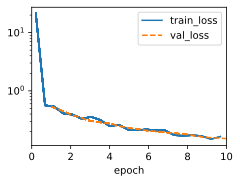

In [ ]:
trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)

In [ ]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False)

# Exercise

**1. Is it always a good idea to replace missing values by a mean? Hint: can you construct a situation where the values are not missing at random?**

Tidak selalu merupakan ide yang baik untuk mengganti nilai yang hilang dengan mean, terutama jika nilai-nilai tersebut tidak hilang secara acak. Berikut adalah situasi di mana nilai yang hilang tidak acak dan menggantinya dengan mean bisa menimbulkan masalah:

Misalnya, jika data mengenai harga rumah yang hilang hanya terjadi pada rumah-rumah yang lebih besar, dan data tersebut hilang karena rumah-rumah yang lebih besar sering tidak melaporkan harga, maka menggantinya dengan mean bisa menyebabkan bias. Mean mungkin lebih rendah dari harga rata-rata untuk rumah yang lebih besar, sehingga prediksi menjadi kurang akurat.

Untuk memvisualisasikan ini dengan contoh coding, kita dapat membandingkan efek mengganti nilai yang hilang dengan mean vs mengganti dengan cara lain (misalnya, median atau prediksi berdasarkan data lain).

Berikut contoh kode untuk mengilustrasikan bagaimana hasilnya jika nilai yang hilang diganti dengan mean dibandingkan dengan median pada dataset Kaggle House Price:

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64
   LotFrontage  SalePrice
0         65.0     208500
1         80.0     181500
2         68.0     223500
3         60.0     140000
4         84.0     250000
5         85.0     143000
6         75.0     307000
7          NaN     200000
8         51.0     129900
9         50.0     118000


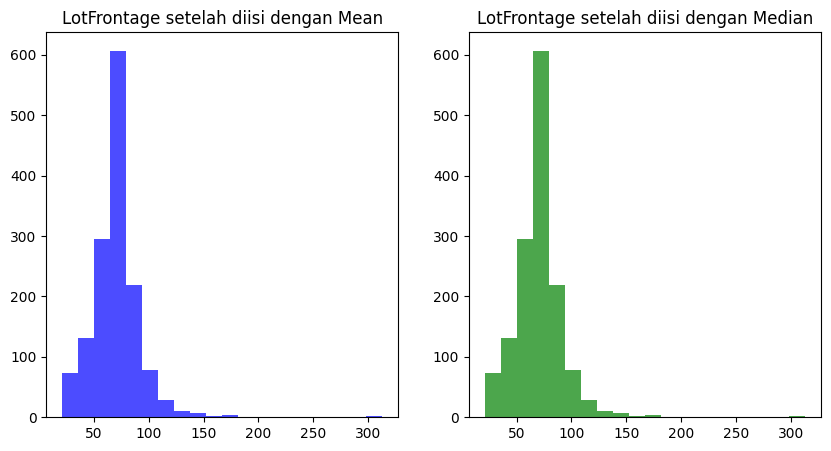

Korelasi antara LotFrontage dan SalePrice (Mean): 0.3349008515405512
Korelasi antara LotFrontage dan SalePrice (Median): 0.3347708531397599


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca data
train_data = pd.read_csv('kaggle_house_pred_train.csv')

# Menampilkan beberapa kolom dengan missing values
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

# Fokus pada kolom 'LotFrontage' yang memiliki nilai yang hilang
print(train_data[['LotFrontage', 'SalePrice']].head(10))

# 1. Mengganti nilai yang hilang dengan mean
train_data_mean = train_data.copy()
train_data_mean['LotFrontage'] = train_data_mean['LotFrontage'].fillna(train_data_mean['LotFrontage'].mean())

# 2. Mengganti nilai yang hilang dengan median
train_data_median = train_data.copy()
train_data_median['LotFrontage'] = train_data_median['LotFrontage'].fillna(train_data_median['LotFrontage'].median())

# Visualisasi perbedaan mean dan median
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(train_data_mean['LotFrontage'], bins=20, color='blue', alpha=0.7)
plt.title('LotFrontage setelah diisi dengan Mean')

plt.subplot(1, 2, 2)
plt.hist(train_data_median['LotFrontage'], bins=20, color='green', alpha=0.7)
plt.title('LotFrontage setelah diisi dengan Median')

plt.show()

# Menghitung korelasi antara LotFrontage dan SalePrice
correlation_mean = train_data_mean[['LotFrontage', 'SalePrice']].corr().iloc[0,1]
correlation_median = train_data_median[['LotFrontage', 'SalePrice']].corr().iloc[0,1]

print(f"Korelasi antara LotFrontage dan SalePrice (Mean): {correlation_mean}")
print(f"Korelasi antara LotFrontage dan SalePrice (Median): {correlation_median}")


**2. Improve the score by tuning the hyperparameters through K-fold cross-validation**

Untuk meningkatkan skor model, kita dapat melakukan tuning hyperparameter menggunakan teknik k-fold cross-validation. Berikut adalah langkah-langkah umum yang digunakan dalam hyperparameter tuning menggunakan k-fold cross-validation:

Langkah-langkah:
1. **Pilih model**: Kita akan menggunakan model seperti `RandomForestRegressor` atau `XGBoost` untuk prediksi harga rumah.
2. **Hyperparameter tuning**: Kita akan melakukan tuning terhadap hyperparameter dengan grid search atau random search.
3. **K-fold cross-validation**: Teknik ini membagi dataset menjadi beberapa lipatan (k) yang sama besar dan mengevaluasi performa model secara konsisten.
4. **GridSearchCV**: Kita akan menggunakan `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik.

Penjelasan:
1. **Preprocessing**: Dataset di-preprocess terlebih dahulu dengan mengisi missing values dan mengubah variabel kategorikal menjadi numerik menggunakan `pd.get_dummies()`.
2. **Hyperparameter Tuning**: Kami menggunakan `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik.
3. **K-fold Cross-Validation**: Kami menggunakan k-fold cross-validation dengan `cv=5`, yang membagi dataset menjadi 5 lipatan untuk menghindari overfitting dan mendapatkan hasil yang lebih stabil.
4. **Evaluasi Model**: Setelah menemukan kombinasi hyperparameter terbaik, kami mengevaluasi model dengan cross-validation dan menghitung rata-rata skornya.

 Hyperparameter yang Dituning:
- `n_estimators`: Jumlah pohon dalam hutan acak.
- `max_depth`: Kedalaman maksimal pohon.
- `min_samples_split`: Minimum jumlah sampel yang dibutuhkan untuk membagi node.
- `min_samples_leaf`: Jumlah minimum sampel yang diperlukan di daun node.
- `bootstrap`: Apakah menggunakan bootstrap sampel ketika membangun pohon.

Dengan melakukan hal ini, Anda akan mendapatkan model yang lebih optimal dan memiliki performa yang lebih baik dibandingkan dengan pengaturan hyperparameter default.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Membaca dataset
train_data = pd.read_csv('kaggle_house_pred_train.csv')

# Preprocessing: Mengisi nilai yang hilang
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

# Menghapus kolom dengan terlalu banyak missing values atau yang tidak relevan
train_data = train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

# Mengubah variabel kategorikal menjadi numerik
train_data = pd.get_dummies(train_data)

# Memisahkan fitur dan target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Inisialisasi model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid untuk dicoba
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV dengan k-fold cross-validation (k=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melakukan training dengan GridSearchCV
grid_search.fit(X, y)

# Menampilkan hyperparameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Mendapatkan skor terbaik
best_rf = grid_search.best_estimator_
score = cross_val_score(best_rf, X, y, cv=5)
print("Cross-validated score: ", score.mean())


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


**3. Improve the score by improving the model (e.g., layers, weight decay, and dropout)**

Untuk meningkatkan skor model, terutama dalam konteks deep learning, kita dapat mengubah beberapa aspek dari arsitektur model, seperti:

1. **Menambah layer**: Meningkatkan kedalaman jaringan untuk menangkap lebih banyak fitur.
2. **Dropout**: Mengurangi overfitting dengan menambahkan dropout pada layer-layer tertentu.
3. **Weight decay (Regularization)**: Menambahkan weight decay untuk menurunkan magnitudo bobot, mencegah overfitting.
4. **Optimizer**: Menggunakan optimizer yang lebih baik seperti Adam atau RMSprop.


Penjelasan kode:

1. **Arsitektur model**:
   - Kita menambahkan **tiga hidden layers** dengan ukuran 128, 64, dan 32 unit. Layer ini menggunakan aktivasi `ReLU` untuk non-linearitas.
   - **L2 regularization** diterapkan pada setiap layer dengan `regularizers.l2(0.001)` untuk weight decay.
   - **Dropout** ditambahkan setelah setiap hidden layer untuk mencegah overfitting (30% dan 20% dropout).
   
2. **Optimizer dan Loss**:
   - Model menggunakan **Adam optimizer** dengan learning rate yang relatif rendah (`0.001`).
   - **Mean Squared Error (MSE)** digunakan sebagai fungsi loss karena ini adalah regresi.

3. **Early Stopping**:
   - Untuk mencegah overfitting dan training terlalu lama, kita menggunakan **EarlyStopping** yang akan menghentikan training jika tidak ada peningkatan pada `val_loss` setelah beberapa epoch.

4. **Evaluasi dan Plotting**:
   - Setelah training, kita mengevaluasi model pada validation set untuk melihat **mean absolute error (MAE)**.
   - Selain itu, grafik loss ditampilkan untuk melihat apakah model mengalami overfitting.
   
   Tuning lebih lanjut:

- **Hyperparameter tuning**: Anda dapat mengubah jumlah unit di setiap layer, tingkat dropout, regularization weight (L2), learning rate, atau bahkan menambah lebih banyak hidden layers untuk meningkatkan kinerja model.
  
Dengan arsitektur yang lebih dalam, regularisasi yang lebih kuat (weight decay), dan dropout, model akan menjadi lebih tangguh terhadap overfitting dan diharapkan akan meningkatkan akurasi pada data yang tidak terlihat.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
import pandas as pd

# Membaca dataset
train_data = pd.read_csv('kaggle_house_pred_train.csv')

# Preprocessing: Mengisi nilai yang hilang
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

# Menghapus kolom dengan terlalu banyak missing values atau yang tidak relevan
train_data = train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

# Mengubah variabel kategorikal menjadi numerik
train_data = pd.get_dummies(train_data)

# Memisahkan fitur dan target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Membagi data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model neural network
def build_model():
    model = models.Sequential()

    # Layer input dan hidden layer pertama dengan L2 regularization
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                           kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization (weight decay)
    model.add(layers.Dropout(0.3))  # Dropout layer

    # Hidden layer kedua
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))  # Dropout layer

    # Hidden layer ketiga
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))  # Dropout layer

    # Output layer
    model.add(layers.Dense(1))  # Layer output, prediksi harga rumah

    # Compile model dengan optimizer Adam dan learning rate yang rendah
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

# Membuat model
model = build_model()

# Melatih model dengan early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop], verbose=1)

# Evaluasi model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation MAE: {val_mae}")

# Plot loss history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**4. What happens if we do not standardize the continuous numerical features as we have done in this section?**

Jika kita **tidak menstandarisasi fitur numerik kontinu**, beberapa masalah dapat muncul, terutama tergantung pada jenis model yang digunakan:

1. **Kesulitan dalam Pelatihan Model**:
   - **Algoritma berbasis gradien** seperti jaringan saraf, regresi logistik, dan support vector machines (SVM) mengasumsikan bahwa fitur-fitur berada pada skala yang serupa. Jika fitur memiliki rentang yang sangat berbeda (misalnya, satu fitur dengan nilai dari 0 hingga 1 dibandingkan dengan fitur lain yang berkisar dari 1.000 hingga 100.000), algoritma mungkin akan memberikan bobot yang terlalu besar pada fitur dengan magnitudo lebih besar.
   - Hal ini dapat menyebabkan **konvergensi yang lebih lambat**, karena gradien akan berosilasi dengan tajam saat berusaha mengoptimalkan parameter, terutama pada model seperti jaringan saraf.
   - Dalam jaringan saraf, pembaruan bobot bisa didominasi oleh fitur bernilai besar, sehingga menyebabkan fitur lain yang mungkin bernilai kecil namun penting tidak dipelajari dengan baik.

2. **Kinerja Buruk pada Model Berbasis Jarak**:
   - Model seperti **K-nearest neighbors (KNN)** dan **SVM** sangat bergantung pada perhitungan jarak (misalnya jarak Euclidean atau jarak kosinus). Jika beberapa fitur tidak distandarisasi, fitur dengan rentang yang lebih besar akan mempengaruhi perhitungan jarak secara tidak proporsional, membuat fitur lain menjadi kurang penting dalam menentukan keluaran.
   - Misalnya, jika satu fitur memiliki nilai ribuan dan fitur lain berkisar antara 0 hingga 1, fitur dengan nilai lebih besar akan mendominasi metrik jarak, meskipun fitur tersebut mungkin kurang relevan untuk tugas tersebut.

 3. **Bias dalam Pentingnya Fitur**:
   - Pada model yang menetapkan koefisien ke fitur, seperti **regresi linier** atau **regresi logistik**, fitur yang tidak distandarisasi dapat mengganggu interpretasi koefisien. Fitur dengan nilai lebih besar akan memiliki koefisien yang lebih tinggi, membuatnya tampak lebih penting, meskipun kontribusi sebenarnya mungkin lebih kecil.
   
4. **Regularisasi Tidak Efektif**:
   - Pada model yang menggunakan **regularisasi** (misalnya, L2 atau L1), jika fitur tidak distandarisasi, regularisasi akan menghukum bobot secara tidak merata. Fitur dengan nilai lebih besar akan memiliki bobot yang lebih tinggi dan dihukum lebih banyak, sementara fitur dengan nilai lebih kecil mungkin tidak diatur secara tepat, yang bisa menyebabkan **overfitting**.

Kesimpulan Masalah Tanpa Standarisasi:
- Konvergensi pelatihan lebih lambat.
- Performa yang suboptimal, terutama pada model berbasis gradien dan jarak.
- Bias dalam interpretasi pentingnya fitur.
- Regularisasi yang tidak efektif, yang bisa menyebabkan overfitting.

Kapan Standarisasi Tidak Diperlukan:
Untuk beberapa model seperti **pohon keputusan** dan **random forest**, standarisasi tidak diperlukan karena model ini berdasarkan aturan pemisahan yang independen terhadap skala fitur. Pada model seperti ini, performa mungkin tidak terlalu terpengaruh jika fitur tidak distandarisasi. Namun, standarisasi tetap penting untuk banyak model pembelajaran mesin lainnya.